# in The name of God

In [1]:
import numpy as np
import pandas

import matplotlib.pyplot as plt

from numpy import linalg as LA

In [2]:
d = pandas.read_excel('data.xlsx')

In [3]:
X = d.iloc[:,1]
Y = d.iloc[:,2]

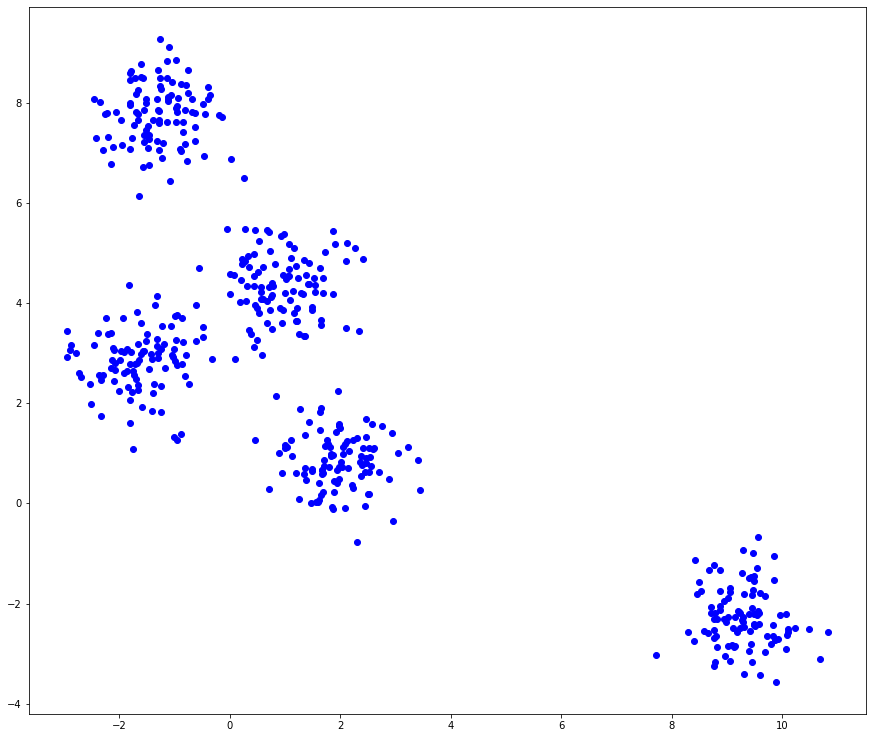

In [174]:
plt.figure(figsize=(15,13))
plt.scatter(X, Y, c ="blue")
plt.show()

Well, it seems like best distance we could work with is Euclidean(L2 norm)

we need to define each point as an object separatly, then doing the job of measures 

In [175]:
points = d.iloc[:,1:3].to_numpy()

In [186]:
#the Algorithm
    #Defining parameters
Nclus = 5                                                    #Number of clusters
Nvar = 2                                                     #Number of variables
a11 = -4; a12 = 12; a21 = -4; a22 = 10;
Npoints = points.shape[0]
################################################################################
means = np.random.random((5,2))                              #means Genesis
means = means@np.diag([a12-a11,a22-a21])
means = means+np.repeat(np.array([[a11, a21]]), 5, 0)

Dist = LA.norm(points, ord = 2, axis = 1, keepdims=True)     #initializing Distance matrix    

for i in range(Nclus):
    Dist = np.hstack((Dist,LA.norm(points-np.repeat([means[i]], Npoints, 0), ord = 2, axis = 1, keepdims=True))) 
                                                             #dist matrix explained at the last cell
Dist = np.delete(Dist,0,1)                                   #drops first column (diastance from zero)
which = np.argmin(Dist, axis=1)                              #says which point belongs to which cluster


Clusters = []                                                #initializing Clusters
for i in range(Nclus):
    Clusters.append(means[i])
for i in range(Npoints):
    Clusters[which[i]] = np.vstack((Clusters[which[i]], points[i]))

In [187]:
Clusters[1]

array([[-1.32521371e+00,  6.22783065e+00],
       [ 3.13640075e-01,  4.33508638e+00],
       [-1.52172727e+00,  3.23408479e+00],
       [-2.26119379e+00,  7.76798043e+00],
       [-2.13772914e+00,  2.87116941e+00],
       [-1.67120859e+00,  8.24344492e+00],
       [-7.60651349e-01,  8.18781564e+00],
       [-1.95483315e+00,  7.15134224e+00],
       [-2.37048176e+00,  2.56384767e+00],
       [ 2.77180174e-01,  4.84428322e+00],
       [-1.81164472e+00,  8.44567261e+00],
       [-1.30248498e+00,  8.65601836e+00],
       [-1.28340771e+00,  7.64493416e+00],
       [ 2.13979079e-01,  4.88542535e+00],
       [-2.14969372e+00,  6.76885984e+00],
       [-1.79041773e+00,  3.02668532e+00],
       [-1.06406044e+00,  3.53554556e+00],
       [ 2.41008767e-01,  4.81040511e+00],
       [-1.11394964e+00,  8.03323380e+00],
       [-1.51903760e+00,  7.99487280e+00],
       [ 7.93137001e-03,  4.17614316e+00],
       [-1.22768985e+00,  3.54666555e+00],
       [-6.14907097e-01,  3.94963585e+00],
       [-1.

In [188]:
means

array([[ 9.69232951, -0.5295528 ],
       [-1.32521371,  6.22783065],
       [11.15643249,  9.52618917],
       [ 1.83591183,  2.28810306],
       [10.826315  ,  9.54989603]])

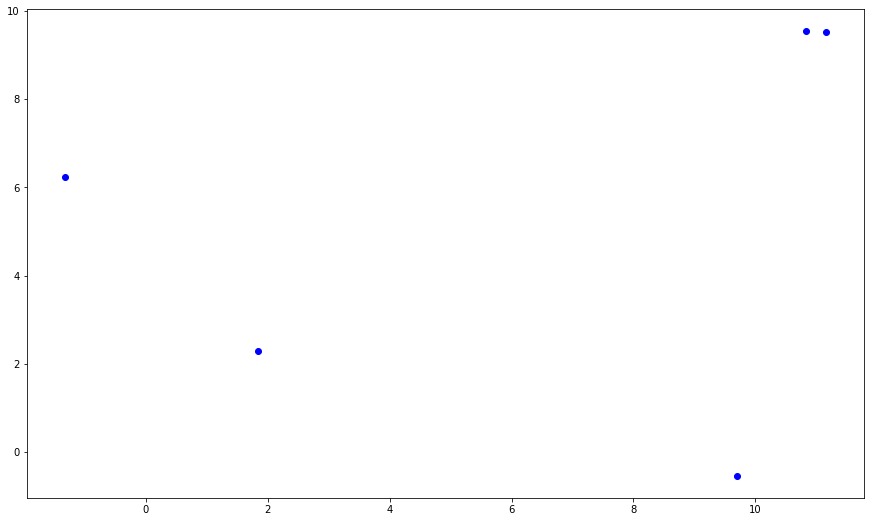

In [189]:
plt.figure(figsize=(15,9))
plt.scatter(means[:,0],means[:,1], c ="blue")
plt.show()

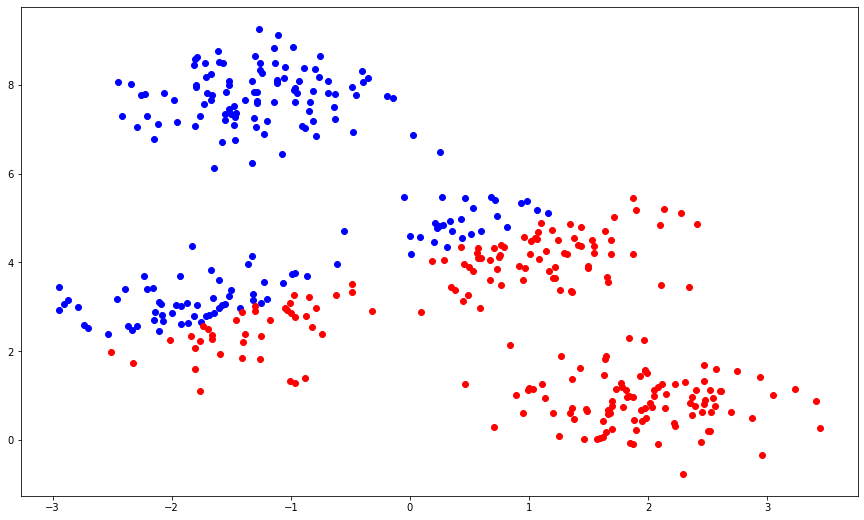

In [190]:
plt.figure(figsize=(15,9))
plt.scatter(Clusters[1][:,0],Clusters[1][:,1], c ="blue")
plt.scatter(Clusters[3][:,0],Clusters[3][:,1], c ="red")
plt.show()

In [160]:
Clusters[1]

array([[ 2.05488995e+00,  5.27866002e+00],
       [ 2.44125620e+00, -4.47103852e-02],
       [ 3.13640075e-01,  4.33508638e+00],
       [ 1.89593761e+00,  5.18540259e+00],
       [-1.52172727e+00,  3.23408479e+00],
       [ 3.47138300e-01,  3.45177657e+00],
       [ 5.59529363e-01,  4.21400660e+00],
       [ 1.83645139e+00,  9.91685973e-01],
       [ 1.76747403e+00,  1.26987864e+00],
       [-2.26119379e+00,  7.76798043e+00],
       [-2.13772914e+00,  2.87116941e+00],
       [ 5.95676822e-01,  4.08614263e+00],
       [-1.67120859e+00,  8.24344492e+00],
       [-1.25245465e+00,  2.33911505e+00],
       [-8.18076852e-01,  2.53874001e+00],
       [ 5.29417185e-01,  3.80792420e+00],
       [-2.32623101e+00,  1.73670745e+00],
       [ 1.88016510e+00,  4.40768333e-01],
       [-8.79985631e-01,  1.38237146e+00],
       [-8.49747575e-01,  3.21548283e+00],
       [ 1.59678117e+00,  3.49887757e-02],
       [-7.60651349e-01,  8.18781564e+00],
       [ 1.10550448e+00,  1.26389129e+00],
       [ 2.

In [ ]:
#Distance matrix has diatance of points from means in columns 1:5 and from zero in column 0
#Clusters is a list contains arrays of each mean point